# Работа с заданием Spotify

## Основаня цель работы - это решение задачи регрессии по предсказанию популярности песни

## Импортируем необходимые библиотеки
* Pandas - используется для обработки и анализа данных
* Numpy - используется для выполнения линейных алгебраических вычеслений
* Matplotlib.pyplot - используется для отрисовки графиков
* Seaborn - также используется для отрисовки графиков

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

/kaggle/input/spotifydataset/dataset.csv


## Читаем файл

In [3]:
df = pd.read_csv('/kaggle/input/spotifydataset/dataset.csv')
df.head(15)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


# EDA

## Расшифровка колонок

* **Unnamed** - колонка номера песни, счетчик
* **track_id** - идентификатор песни. Является случайным набором цифр и латинских букв.
* **artists** - имена или псевдонимы артистов, работавщих над песней. Если их несколько, то они указываются через **;**. Является текстом.
* **album_name** - название альбома, из которого была взята песня. Является текстом.
* **track_name** - название песни, является текстом.
* **popularity** - индекс популярности песни, может принимать значения от 0 до 100 включительно. **Именно это значение нужно будет предсказать.**
* **duration_ms** - длина песни в милисекундах, является целым числом.
* **explicit** - булевское значение, показывающее присутствуют ли в песне нецензурная лексика. **True** - присутствует, **False** - отсутствует.
* **danceability** - показатель того насколько песня подходит для танцев. Принимает значения в виде дробного числа от 0 до 1.
* **energy** - показатель энергичности песни. Принимает значения в виде дробного числа от 0 до 1.
* **key** - тональность песни. Является целым числом от 0 до 11.
* **loudness** - показатель громкости песни. Является дробным числом.
* **mode** - режим аудиозаписи. Принимает значения либо 0, либо 1.
* **speechiness** - показатель красноречивости текста в песне. Принимает значения в виде дробного числа от 0 до 1.
* **acousticness** - показатель звучания песни, оценивает качество звука. Принимает значения в виде дробного числа от 0 до 1.
* **instrumentalness** - показатель звучания инструментов в песне. Принимает значение в виде дробного числа от 0 до 1.
* **liveness** - показатель живости песни. Принимает значения в виде дробного числа от 0 до 1.
* **valence** - валентность песни, означает привлекательность звуков для человеческого слуха. Принимает значения в виде дробного числа от 0 до 1.
* **tempo** - темп песни, указывается в виде BPM (удары в минуту). Принимает значения в виде дробного числа.
* **time_signature** - размер такта, указывает сколько ударов приходится на каждый такт песни. Указывается в виде целого числа от 0 до 4.
* **track_genre** - жарн песни, является текстом.

## Просмотр данных

In [4]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


В датасете большое кол-во данных, а именно 114000 песен.

## Удаление ненужных столбцов

### Удалим колонки **Unnamed** и **track_id**, так как они никак не влияют на популярность песни.

In [5]:
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)
df

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Избавление от пропусков

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

Видим что есть 3 нулевых значиния, а именно в колонках artists, album_name, track_name. Есть предположение, что они все находятся в одной строке. Проверим это

In [7]:
df[df.isnull().any(axis=1)]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Действительно, это так. Поэтому просто удалим ее

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Как видим пропусков нет.

# Анализируем dataset

## Изменение колонок

Теперь изменим значение колонки explicit. Заменим булевское значение на целое число. True - 1, False - 0.

In [10]:
df['explicit'] = df['explicit'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  int64  
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

/tmp/ipykernel_24/3027638561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['explicit'] = df['explicit'].astype('int64')


Заметим что в колонке duration_ms длина песни находится в миллисекундах. Для удобства переведем время в минуты. Чтобы это сделать, округлим результат деления значения из duration_ms на 60000, и также переименнуем duration_ms в duration_min.

In [11]:
def change_to_min(x):
    return round(x / 60000, 1)

#меняем значения в колонке с миллисекунд на минуты
df['duration_ms'] = df['duration_ms'].apply(change_to_min)

#меняем название колонки
df = df.rename(columns={'duration_ms' : 'duration_min'})

/tmp/ipykernel_24/2651048276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_ms'] = df['duration_ms'].apply(change_to_min)


In [12]:
df['duration_min']

0         3.8
1         2.5
2         3.5
3         3.4
4         3.3
         ... 
113995    6.4
113996    6.4
113997    4.5
113998    4.7
113999    4.0
Name: duration_min, Length: 113999, dtype: float64

Зададим палитру для графиков

In [13]:
sns.set(style='whitegrid')
colors = ['#ff6600', '#002eff']
palette = {0: colors[0], 1: colors[1]}

## Матрица корреляции

Для анализа стоит расмотреть матрицу корреляции. Представим ее в виде тепловой карты.

Параметры для heatmap:
* **data** - данные на которых строится тепловая карта.
* **fmt** - формат надписей в ячейках. **.2f** означает что оставляем 2 знака после запятой.
* **annot** - добавляет значения в ячейки при **True**.
* **cmap** - устанавливает цветовую схему.
* **ax** - устанавливает оси.

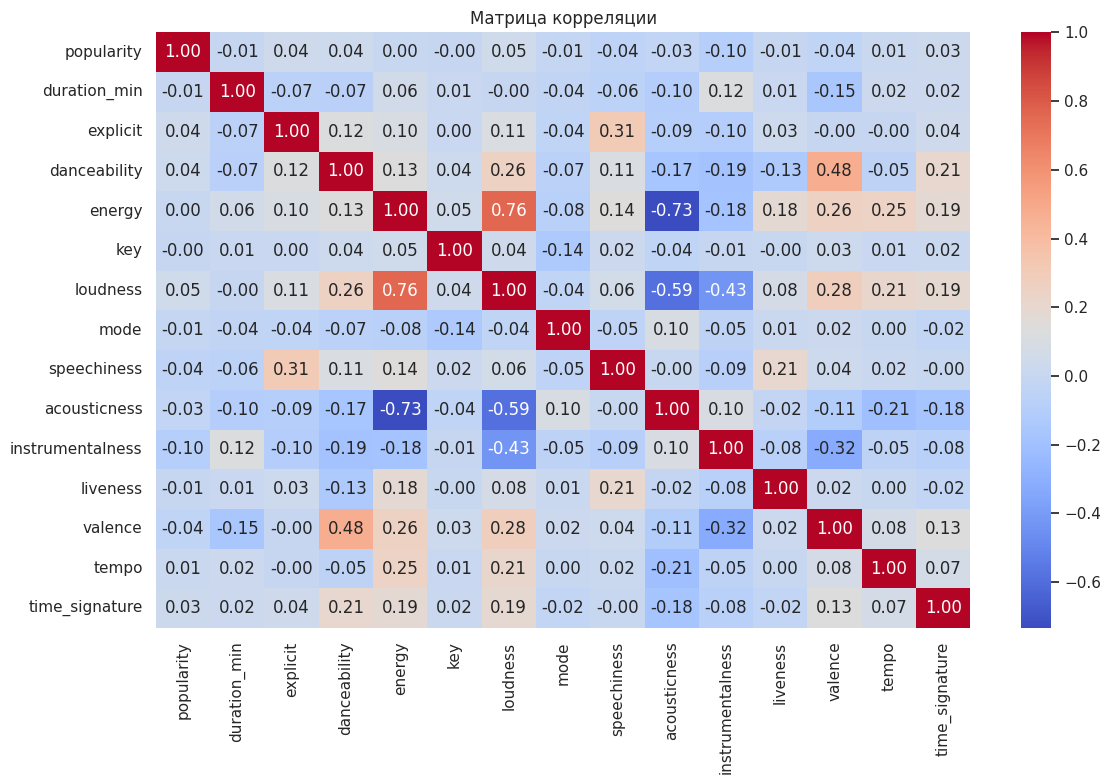

In [14]:
corr_data = df.loc[:, ['popularity', "duration_min", 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 
                         'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

#посторение тепловой карты корреляции
corr_data_1 = corr_data.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data=corr_data_1, fmt='.2f', annot=True, cmap='coolwarm', ax=ax)

plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()

**Результаты анализа матрицы корреляции:**

1. **speechiness** и **explicit**
* Эта корреляция показывает что наличие в песне нецензурной лексики связана с красноречивостью песни. То есть чем больше матов, тем красноречивее текст песни.
2. **loudness** и **energy**
* Эта корреляция показывает что громкость музыки и энергичность очень хорошо связаны. Чем громче музыка, тем она энергичнее.
3. **acousticness** и **energy**
* Данная корреляция показывает что музыка c качественным звуком не энергичная.
4. **valence** и **danceability**
* Корреляция говорит что чем приятнее музыка, тем сильнее под нее хочется танцевать.
5. **acousticness** и **loudness**
* Это корреляция говорит, что чем тише музыка, тем в ней более качественее звук.
6. **instrumentalness** и **loudness**
* Корреляция показывает что, чем болешь в ней муз. инструментов и они более качественные, тем она тише.
7. **valence** и **instrumentalness**
* Данная корреляция говорит о том, что чем приятнее слушать песню, тем в ней качественее инструменты.

Также рассмотри корреляцию с таргетной переменной **popularity**

In [15]:
corr_popularity = corr_data_1['popularity'][1:]
corr_popularity

duration_min       -0.007167
explicit            0.044078
danceability        0.035444
energy              0.001053
key                -0.003847
loudness            0.050420
mode               -0.013948
speechiness        -0.044930
acousticness       -0.025458
instrumentalness   -0.095147
liveness           -0.005397
valence            -0.040522
tempo               0.013212
time_signature      0.031076
Name: popularity, dtype: float64

Видим что корреляция не очень сильная. Значит популярность песни почти не зависит от представленных признаков.

Тогда отчего же зависит популярность песни? Есть несколько вариантов:
* От закодированных признаков (**artists**, **album_name**, **track_name**, **track_genre**).
* От внешних признаков (реклама, продвижение).

Проверим это.

# Гипотезы и создание признаков

## 1. Чем песня короче, тем она популярна

#### Посмотрим как меняется популярность песни от ее длины

#### Создаем график, где по оси X будет длина песни в минутах, а по оси Y будет популярность песни. Каждая песня обозначена точкой.

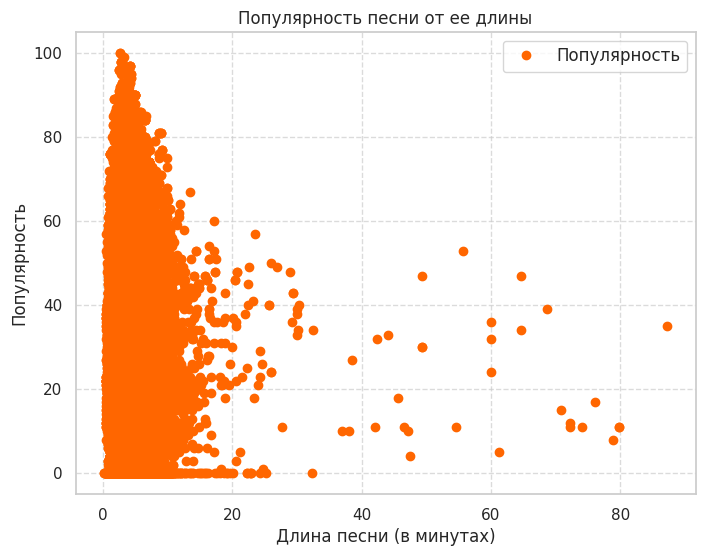

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('whitegrid')

#создаем график
ax.plot(df['duration_min'], df['popularity'], marker='o', linestyle='', color='#ff6600', linewidth=2, label='Популярность')

#установка сетки
ax.grid(True, linestyle='--', alpha=0.7)

ax.set_xlabel('Длина песни (в минутах)')
ax.set_ylabel('Популярность')
ax.set_title('Популярность песни от ее длины')

ax.legend(fontsize=12)
plt.show()

#### **Вывод по графику:** из графика видно, что песни длинной больше 10 мин не так популярны, как песни которые меньше 10 мин.

#### **Вывод по гипотезе:** песни длиной меньше 10 минут более популярны.

#### Создание признака

#### Если **duration_min** имеет значение меньше 10, то вероятность популярности песни будет выше, если бы иначе. Создадим признак **dur_10_min**, который будет иметь значение 1, если песня длится менее 10 мин, и 0 если более 10 мин.

In [17]:
df['dur_10_min'] = df['duration_min'] < 10
df['dur_10_min'] = df['dur_10_min'].astype('int64')

## 2. Валентность песни влияет на популярность

#### Может быть что популярность песни зависит от ее валентносит (привлекательности звуков **valence**). Проверим это построив график линейной регрессии

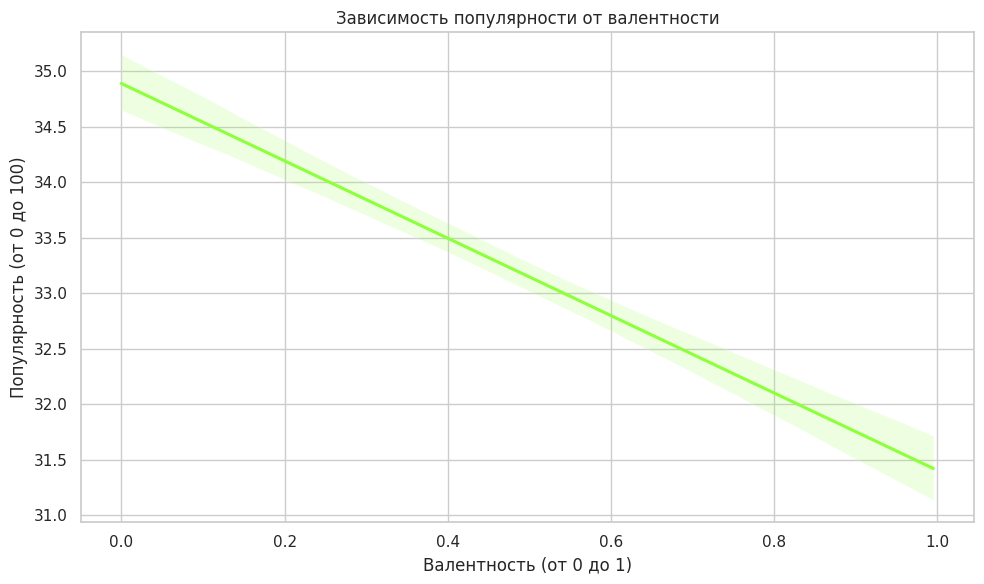

In [18]:
plt.figure(figsize=(10, 6))

#добавляем линейную регрессию для лучшего предстваления зависимости
sns.regplot(x='valence', y='popularity', data=df, scatter=False, color='#8eff3c')

plt.title('Зависимость популярности от валентности')
plt.xlabel('Валентность (от 0 до 1)')
plt.ylabel('Популярность (от 0 до 100)')

#отображаем график
plt.tight_layout()
plt.show()

#### **Вывод по гипотезе:** видим что график убывает, значит чем меньше валентность, тем больше вероятность популярности песни. Также видно, что **valence** и **popularity** связаны друг с другом. Поэтому создадим признак.

#### Создадим признак **low_valence**, который принимает 1, если **valence** < 0.5, и 0, если **valence** >= 0.5.

In [19]:
df['low_valence'] = df['valence'] < 0.5
df['low_valence'] = df['low_valence'].astype('int64')

## 3. Популярность песни зависит от жанра.

#### Для начало узнаем количество жанров.

In [20]:
len(df['track_genre'].unique())

114

#### Теперь выведем по 10 самых популярных и не популярных жанров песен

In [21]:
#считаем популярность жанров
genre_popularity = list(df.groupby('track_genre')['popularity'].sum())
#список жанров
genre = list(df['track_genre'].unique())
#создаем словарь популярности жанров {жанр : популярность}
genres = {} 
for i in range(len(genre_popularity)):
    genre_popularity[i] /= 10000 #масшабируем популярность, для лучшего отображения графиков
    genres[genre[i]] = genre_popularity[i]

#отсортируем жанры по убыванию и возрастанию сообственно
genres_sorted_dec = dict(sorted(genres.items(), key=lambda item: item[1], reverse=True))
genres_sorted_inc = dict(sorted(genres.items(), key=lambda item: item[1], reverse=False))

#создаем генераторы для графиков
from itertools import islice
top_up_10 = islice(genres_sorted_dec.items(), 10)
top_down_10 = islice(genres_sorted_inc.items(), 10)

x_top = list()
y_top = list()
x_down = list()
y_down = list()

#### Топ 10 самых популярных жанров

In [22]:
for key, value in top_up_10:
    print(f'{key}: {value}')
    x_top.append(key)
    y_top.append(value)

pop: 5.9283
k-pop: 5.6896
chill: 5.3651
sad: 5.2379
grunge: 4.9594
indian: 4.9539
anime: 4.8772
emo: 4.8128
sertanejo: 4.7866
pop-film: 4.7576


#### Топ 10 самых наименее популярных жанров

In [23]:
for key, value in top_down_10:
    print(f'{key}: {value}')
    x_down.append(key)
    y_down.append(value)

iranian: 0.221
romance: 0.3245
latin: 0.8297
detroit-techno: 1.1174
chicago-house: 1.2339
classical: 1.3055
jazz: 1.3628
grindcore: 1.4625
kids: 1.4888
idm: 1.5766


#### Построим графики этих рейтигов. По оси X будет название жанра, а по оси Y будет популярность жарнра, деленая на 10000.

#### Для 10 самых популярных жанров

In [23]:
# #построение столбчатой диаграммы
# plt.figure(figsize=(12, 6))
# sns.set_style('whitegrid')

# sns.barplot(x=x_top, y=y_top, color='#ffb34b', orient='v')

# plt.title('Топ 10 самых популярных жанров музыки')
# plt.xlabel('Жарн')
# plt.ylabel('Популярность')

# #добавление текста над каждым столбцом
# for i, v in enumerate(y_top):
#     plt.text(i, v, f'{v:.4f}', ha='center', ba='bottom')

# plt.tight_layout()
# plt.show()

#### Для 10 наименее популярных жанров

In [24]:
# #построение столбчатой диаграммы
# plt.figure(figsize=(12, 6))
# sns.set_style('whitegrid')

# sns.barplot(x=x_down, y=y_down, color='#3c8eff', orient='v')

# plt.title('Топ 10 наименее популярных жанров музыки')
# plt.xlabel('Жарн')
# plt.ylabel('Популярность')

# #добавление текста над каждым столбцом
# for i, v in enumerate(y_down):
#     plt.text(i, v, f'{v:.4f}', ha='center', ba='bottom')

# plt.tight_layout()
# plt.show()

#### Однако создать признак по этой гипотезе будет читерством, так как такой признак будет очень сильно связана в тагретной колонкой. По данной причине не будем создавать признак

#### **Вывод по гипотизе:** популярность зависит от жанра

## 4. Чем энергичнее песня, тем она более популярна

#### На популяроность песни может влиять ее энергичность. С большей энергичность песня будет более популярна

#### Построим график регрессии популярности от энергичности

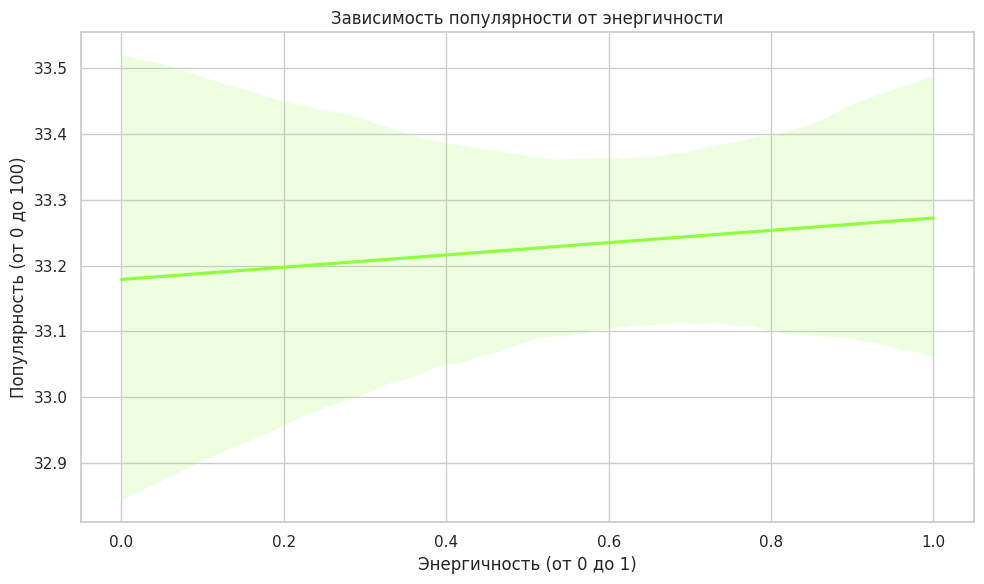

In [24]:
plt.figure(figsize=(10, 6))

#добавляем линейную регрессию для лучшего предстваления зависимости
sns.regplot(x='energy', y='popularity', data=df, scatter=False, color='#8eff3c')

plt.title('Зависимость популярности от энергичности')
plt.xlabel('Энергичность (от 0 до 1)')
plt.ylabel('Популярность (от 0 до 100)')

#отображаем график
plt.tight_layout()
plt.show()

#### **Вывод по гипотезе:** популярность песни не зависит от ее энергичности, поэтому признак делать не будем.

## 5. Инструментальность песни влияет на популярность

Возможно, что **instrumenlness** влияет на популярность песни. Проверим это построи график линейной регрессии

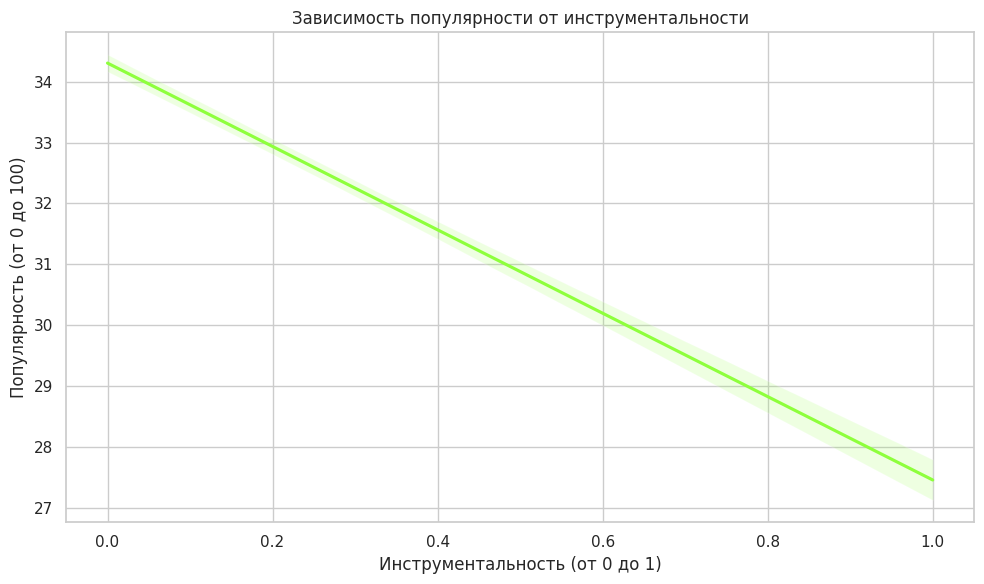

In [25]:
plt.figure(figsize=(10, 6))

#добавляем линейную регрессию для лучшего предстваления зависимости
sns.regplot(x='instrumentalness', y='popularity', data=df, scatter=False, color='#8eff3c')

plt.title('Зависимость популярности от инструментальности')
plt.xlabel('Инструментальность (от 0 до 1)')
plt.ylabel('Популярность (от 0 до 100)')

#отображаем график
plt.tight_layout()
plt.show()

#### **Вывод по гипотезе:** видим что график убывает, значит чем меньше валентность, тем больше вероятность популярности песни. Также видно, что instrumentalness и popularity связаны друг с другом. Поэтому создадим признак.¶

#### Признак назавем **low_instrum**. Он принимает значение 1, если **instrumentalness** < 0.5, и 0, если **instrumentalness** >= 0.5. 

In [26]:
df['low_instrum'] = df['instrumentalness'] < 0.5
df['low_instrum'] = df['low_instrum'].astype('int64')

## 6. Танцеватльность песни влияет на популярность

#### На популярность песни также возможно может влиять ее танцеватльность (**danceability**). Проверим это построив график зависимости **popularity** от **danceability**

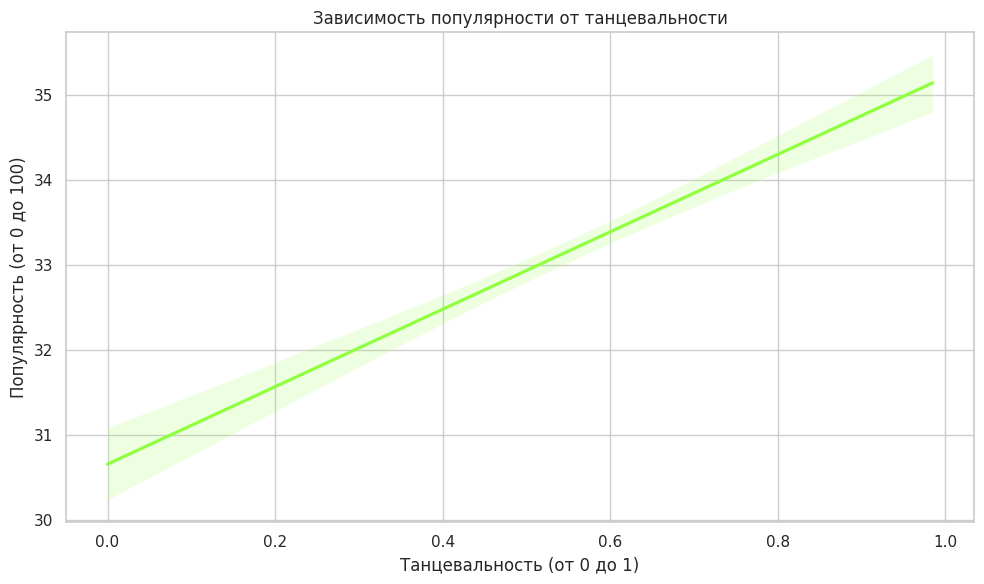

In [27]:
plt.figure(figsize=(10, 6))

#добавляем линейную регрессию для лучшего предстваления зависимости
sns.regplot(x='danceability', y='popularity', data=df, scatter=False, color='#8eff3c')

plt.title('Зависимость популярности от танцевальности')
plt.xlabel('Танцевальность (от 0 до 1)')
plt.ylabel('Популярность (от 0 до 100)')

#отображаем график
plt.tight_layout()
plt.show()

#### **Вывод по гипотезе:** популярность зависит от танцевальности, но не намного. Сделаем признак

#### Создадим признак **high_danceability**. Он будет равен 1, если **danceability** >= 0.5, и равен 0, если **danceability** < 0.5

In [28]:
df['high_danceability'] = df['danceability'] >= 0.5
df['high_danceability'] = df['high_danceability'].astype('int64')

## 7. Влияние громкости на популярность

#### Возможно что громкость (**loudness**) песни влияет на ее популярность. Проверим это построив график линейной регрессии

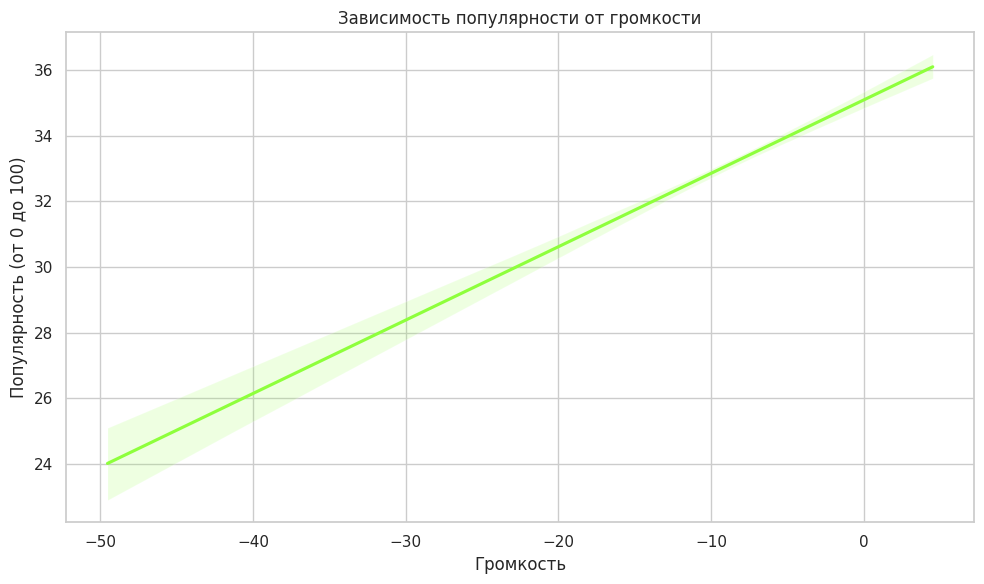

In [29]:
plt.figure(figsize=(10, 6))

#добавляем линейную регрессию для лучшего предстваления зависимости
sns.regplot(x='loudness', y='popularity', data=df, scatter=False, color='#8eff3c')

plt.title('Зависимость популярности от громкости')
plt.xlabel('Громкость')
plt.ylabel('Популярность (от 0 до 100)')

#отображаем график
plt.tight_layout()
plt.show()

#### **Вывод по гипотезе:** популярность песни зависит от громкости. Сделаем признак.

#### Для этого найдем среднюю громкость

In [30]:
avg_loudness = sum(df['loudness']) / len(df)
avg_loudness

-8.258949832893377

#### Создадим признак **high_loudness**, который принимает значение 1, если **loudness** >= **avg_loudness** и 0 в ином случаем

In [31]:
df['high_loudness'] = df['loudness'] >= avg_loudness
df['high_loudness'] = df['high_loudness'].astype('int64')

## Выводы

### Выводы из проверки гипотез:
* #### **Популярность** песни зависит от ее длины. Если песня длинее 10 минут, то она будет менее популярна, чем песня длина которой менее 10 минут.
* #### **Популярность** песни обратно зависима от валентности (**valence**)
* #### **Популярность** песни зависит от жанра, но это из-за того что мы используем таргентую переменую, поэтому не создаем признак
* #### **Популярность** песни не зависит от ее энергичности (**energy**)
* #### **Популярность** песни обратно зависит от ee инструментальности (**instrumentalness**)
* #### **Популярность** песни зависит от ее танцевальности (**dancebility**)
* #### **Популярность** песни прямо зависит от ее громкости (**loudness**)

### Созданные признаки:
* #### **dur_10_min**
* #### **low_valence**
* #### **low_instrum**
* #### **high_danceability**
* #### **high_loudness**

# Корреляция новых признаков с таргетом

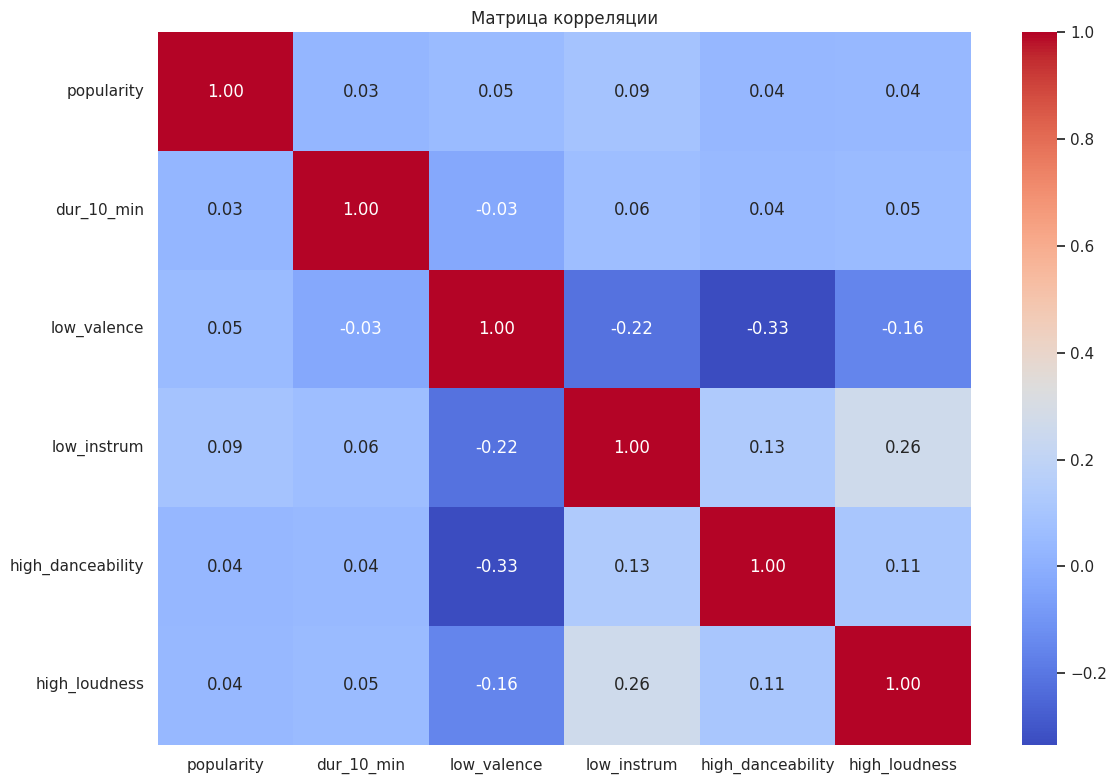

In [32]:
#датафрейм с новыми строчками и тагретом
corr_data = df.loc[:, ['popularity', 'dur_10_min', 'low_valence', 'low_instrum', 'high_danceability', 'high_loudness']]

#построение тепловой карты корреляции
corr_data_1 = corr_data.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data=corr_data_1, fmt='.2f', annot=True, cmap='coolwarm', ax=ax)

plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()

## Выводы: 

#### Мы видим что новые признака слабо почта не коррелирует с таргетной переменной. В итоге репрезентативных признаков создать не получилось. 

In [33]:
df

,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,loudness,...,liveness,valence,tempo,time_signature,track_genre,dur_10_min,low_valence,low_instrum,high_danceability,high_loudness
0,Gen Hoshino,Comedy,Comedy,73,3.8,0,0.676,0.4610,1,-6.746,...,0.3580,0.7150,87.917,4,acoustic,1,0,1,1,1
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,0,0.420,0.1660,1,-17.235,...,0.1010,0.2670,77.489,4,acoustic,1,1,1,0,0
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,0,0.438,0.3590,0,-9.734,...,0.1170,0.1200,76.332,4,acoustic,1,1,1,0,0
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,0,0.266,0.0596,0,-18.515,...,0.1320,0.1430,181.740,3,acoustic,1,1,1,0,0
4,Chord Overstreet,Hold On,Hold On,82,3.3,0,0.618,0.4430,2,-9.681,...,0.0829,0.1670,119.949,4,acoustic,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,6.4,0,0.172,0.2350,5,-16.393,...,0.0863,0.0339,125.995,5,world-music,1,1,0,0,0
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,6.4,0,0.174,0.1170,0,-18.318,...,0.1050,0.0350,85.239,4,world-music,1,1,0,0,0
113997,Cesária Evora,Best Of,Miss Perfumado,22,4.5,0,0.629,0.3290,0,-10.895,...,0.0839,0.7430,132.378,4,world-music,1,0,1,1,0
113998,Michael W. Smith,Change Your World,Friends,41,4.7,0,0.587,0.5060,7,-10.889,...,0.2700,0.4130,135.960,4,world-music,1,1,1,1,0


# Обучение на простой модели

#### Построим простую модель для того, чтобы в дальнейшем сделать **Feature Importance**

### Нормализация данных

#### Посмотрим какие типы данных содеиржит колонки.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   artists            113999 non-null  object 
 1   album_name         113999 non-null  object 
 2   track_name         113999 non-null  object 
 3   popularity         113999 non-null  int64  
 4   duration_min       113999 non-null  float64
 5   explicit           113999 non-null  int64  
 6   danceability       113999 non-null  float64
 7   energy             113999 non-null  float64
 8   key                113999 non-null  int64  
 9   loudness           113999 non-null  float64
 10  mode               113999 non-null  int64  
 11  speechiness        113999 non-null  float64
 12  acousticness       113999 non-null  float64
 13  instrumentalness   113999 non-null  float64
 14  liveness           113999 non-null  float64
 15  valence            113999 non-null  float64
 16  tempo  

#### Видим что у нас есть колонки с типом **object**. Для модели это не допустимо, поэтому перекодируем данные колонки.

#### Для этого воспользуемся методом **LabelEncoder**. 
#### Скопируем датасет в новую переменную, затем  выберем переменные которые нуждаются в кодировке (с типом **object**).

In [35]:
from sklearn.preprocessing import LabelEncoder
from copy import copy

#копируем датасет
norm_data = copy(df)

#достаем колонки, которые нуждаются в кодировке
categorical_cols = norm_data.select_dtypes(include=['object']).columns
label_encoders = {}

#кодирование
for col in categorical_cols:
    le = LabelEncoder()
    norm_data[col] = le.fit_transform(norm_data[col])
    label_encoders[col] = le

### Разделение данных на тестовый и обучающий датасеты

#### Разделим датасет на два датасета: x и y. X содержит в себе все признаки, кроме таргетной переменной, y содержит только таргетную переменную. При помощи **train_test_split** разделим их на обучающую и тестовую выборки в соотношении 80% к 20% соответственно.

In [36]:
from sklearn.model_selection import train_test_split

x = norm_data.drop(columns=['popularity'])
y = norm_data['popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Создание простой модели

#### Импортируем две библиотеки: **tensorflow** и **keras**, обе используются в ML.

In [37]:
import tensorflow as tf
from tensorflow import keras

#### Создаем простую модель полносвязной нейронной сети.
Для начала мы скейлим данные при помощи **StandartScaler**
Затем строим саму модель. Состоять она будет из 3 слоев.
* **Входной слой**. В нем 64 нейрона, функция активации - **relu**, в качестве входного размера даем кол-во признаков.
* **Скрытый слой**. В нем 64 нейрона, функция активации - **relu**.
* **Выходной слой**. В нем 1 нейрон и функции активации нет. Все потому что модель должна выдавать одно предсказание число, потому всего один нейрон и потому функция активации не применяется.


#### Компилируем модель. В качестве оптимизатора используем **Adam**, в качестве метрики **Mean Squared Error (MSE)** (средняя квадратичная ошибка).

In [38]:
from sklearn.preprocessing import StandardScaler

#скейлинг данных
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#построение модели
model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])

#компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Обучение модели

#### Теперь модель необходимо обучить и найти **loss**

#### Гиперпараметры обучения:
* **epochs = 10** - это кол-во эпох, в течение которых обучается модель.
* **batch_size = 32** - это размер пакета (модель для обучения получает данные пакетами).
* **validation_split = 0.2** - это выделение данных на валидацию. То есть мы веделяем из обучающих данных 20% на валидацию. На валидации также считается метрика.

In [40]:
#обучение модели
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

#нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 618.4960 - val_loss: 477.4024
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 469.8985 - val_loss: 467.8563
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 463.0858 - val_loss: 461.3076
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 455.2039 - val_loss: 454.1016
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 444.7413 - val_loss: 450.5381
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 436.6177 - val_loss: 450.2081
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 433.9675 - val_loss: 445.4507
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 431.3337 - val_loss: 438.6006
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 423.8262 - val_loss: 438.1895
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 422.0665 - val_loss: 434.6370
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - loss: 434.8124
Test loss: 427.8777

#### Изобразим график изменения loss на валидационном и тренировочном датасете.

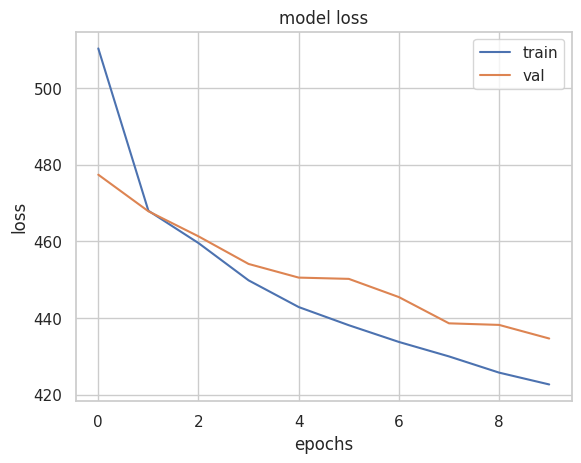

In [41]:
#изменения лосса на тренировочном датасете
plt.plot(history.history['loss'])
#изменения лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#### Видим что **loss** постепенно снижается.

### Прогназирование от простой модели

#### Попробуем получить прогнозы от простой модели и получить метрики:
* **MAE (mean absolute error)** - средняя абсолютная ошибка. Получается при помощи среднего арифметического разностей предсказания и факта.
* **MSE (mean squared error)** - средняя квадратичная ошибка. Получается при помощи среднего арифметического квадратов разностей предсказания и факта.
* **RMSE (root mean squared error)** - корень из средней квадратичной ошибки. Получаесят корнем из **MSE**.

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#прогназирование на тестовой выборке
y_pred = model.predict(x_test)

#вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 16.71968482580624
MSE: 427.8776389403991
RMSE: 20.68520338165422


#### Метрики получились довольно большие

# Permutation Importance

#### Выявим важность признаков на лосс. Сделаем это при помощи **Permutation Importance** (важность перестановок). Общая идея состоит в том, чтобы наблюдать как случайное перемешивание (перестановка) каждой функции влияет на результативность модели.

#### Параметры доя **permutation importanse**:
* **estimator = model** - обученная модель, на которой проверяется важность.
* **x = x_test** - данные, на которых будет считаться важность.
* **y = y_test** - таргетная переменная.
* **n_repeats = 10** - кол-во перестановок для каждого признака.
* **random_state = 42** - псевдослучайное число для управленияе перестановками каждой функции.
* **scoring = 'neg_mean_absolute_error'** - это метрика, по которой определяем важность. Используется уменьшение средней абсолютной ошибки в нашем случае.

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━

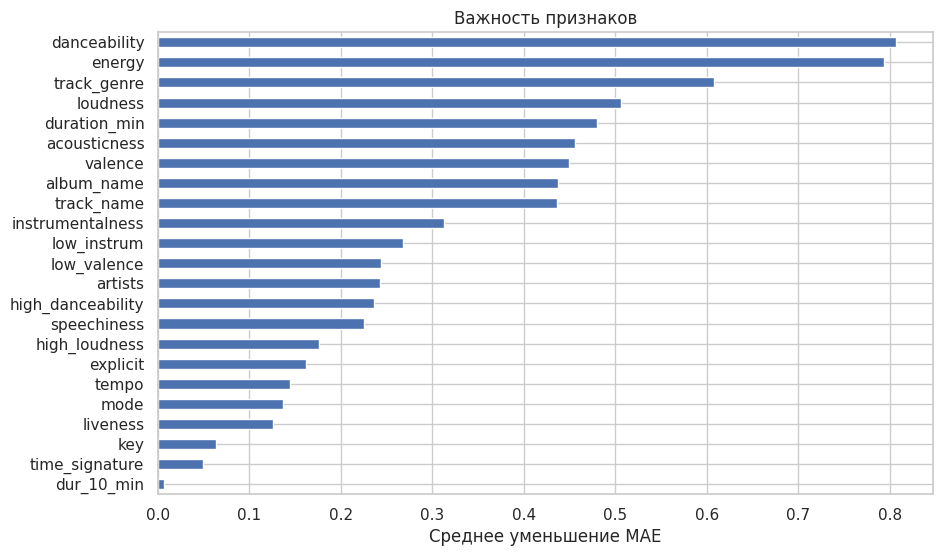

In [43]:
from sklearn.inspection import permutation_importance

#permutation importance
result = permutation_importance(model,
                               x_test,
                               y_test,
                               n_repeats=10,
                               random_state=42,
                               scoring = 'neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=x.columns)

#визуализация
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

## Вывод:
1. Видим что **energy** весьма сильно влияет на уменьшение MAE
2. Созданный признак **dur_10_min** влияет плохо, остальные созданные признаки влияют средне
3. Довольно много признаков, которые практически никак не влияют на уменьшение MAE
4. Важность признаков в целом довольно маленькая

#### Избавимся от признаков, которые ниже 0.1

In [39]:
norm_data_result = norm_data.drop(columns=['dur_10_min', 'time_signature', 'key', 'explicit'])

### В итоге датасет выглядит так:

In [40]:
norm_data_result

,artists,album_name,track_name,popularity,duration_min,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,low_valence,low_instrum,high_danceability,high_loudness
0,10357,8100,11741,73,3.8,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,0,0,1,1,1
1,3287,14796,22528,55,2.5,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,0,1,1,0,0
2,12397,39162,60774,57,3.5,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,0,1,1,0,0
3,14839,8580,9580,71,3.4,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,0,1,1,0,0
4,5255,16899,25689,82,3.3,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,6.4,0.172,0.2350,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,113,1,0,0,0
113996,22486,66,65090,22,6.4,0.174,0.1170,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,113,1,0,0,0
113997,4952,5028,38207,22,4.5,0.629,0.3290,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,113,0,1,1,0
113998,18534,7238,21507,41,4.7,0.587,0.5060,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,113,1,1,1,0


# Построение моделей машинного обучения

#### Нужно построить модели из каждого семейства: **деревья**, **линейные**, **модификации градиентного бустинга**, **нейроные сети**.

#### Разделим датасет на тренировочный и тестовый выборки:

In [41]:
x = norm_data_result.drop(['popularity'], axis=1)
y = norm_data_result['popularity']

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True)

## Построение модели дерева (Random Forest Regressor)

#### Построим модель регрессии случайного леса - **Random Forest Regressor**.

#### Этот метод основан на создании множества деревьев решений и их комбинировании. То есть создается множетсво отдельных деревьев решенй. Каждое дерево учитывает только часть признаков в подвыборке данных. При прогнозе используется среднее значение предсказаний всех деревьем.

#### Преимущества:
* Уменьшает переобучение за счет случайной выборки
* Может обрабатывать нелинейные зависимости между признаками и таргетной переменной.
#### Значения параметров:
* **max_depth** - максимальная глубина дерева решений. Ограничивает кол-во уровней в дереве, чтобы предотварить переобучение.
* **n_estimators** - кол-во деревьев в случайном лесу
* **min_samples_split** - минимальное кол-во образцов для раздедения узла. Узел будет разделен только если в нем больше или ровно 5 образцов. Помогает избежать переобучения.
* **min_samples_leaf** - минимальное кол-во образцов в листовых узлах. Листовой узел будет создан только если в нем больше или ровно 2 образца. Это помогает предотвратить слишком мелкие деревья.
* **random_state** - начальное состояние для генератора случайных числел.

In [47]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(
    max_depth = 10,
    n_estimators = 1000,
    min_samples_split = 5,
    min_samples_leaf = 2,
    random_state = 0
)
random_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=1000, random_state=0)

#### Узнаем метрики для данной модели. Будем использовать метрики **MAE**, **MSE**, **RMSE**, **R2**.

In [48]:
from sklearn.metrics import r2_score

#прогназирование на тестовой выборке
y_pred_rf = random_forest.predict(x_test)

#вычисление метрик
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print('Метрики для случайного леса регрессии:')
print(f'MAE: {mae_rf}')
print(f'MSE: {mse_rf}')
print(f'RMSE: {rmse_rf}')
print(f'R2: {r2_rf}')

Метрики для случайного леса регрессии:
MAE: 15.36547171293744
MSE: 369.49646419921686
RMSE: 19.222290815592633
R2: 0.2549113222525933


### Вывод: метрики довольне не плохие, но все равно не идеальные.

## Построение модели линейной регрессии (Linear Regressor)

#### Построим модель линейной регрессии (**Linear Regressor**)
#### Она использует прямую линию для предсказания значений. Она рассчитывает, что таргетная переменная линейно зависит от признаков.
#### Формула: **Y = X0**, где **Y** - это таргетная переменная, **X** - это матрица признаков (предикантов), 0 - это вектор весовых коэффициентов.
#### Модель должна подобрать веса. Для этого используется метод квадратов.
#### Преимущества:
* Простота
* Широкое применение

In [49]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

#### Узнаем метрики для линейной регрессии

In [50]:
#прогназирование на тестовой выборке
y_pred_lr = linear_regression.predict(x_test)

#вычисление метрик
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

print('Метрики для линейной регрессии:')
print(f'MAE: {mae_lr}')
print(f'MSE: {mse_lr}')
print(f'RMSE: {rmse_lr}')
print(f'R2: {r2_lr}')

Метрики для линейной регрессии:
MAE: 18.31519590550737
MSE: 482.6034735677787
RMSE: 21.968237834832784
R2: 0.02683132631263785


#### Выводы: данная модель самая простая, быстро обучаема, но метрики у нее довольно низкие в сравнение с другими моделями.

## Построение модели градиентного бустинга (Gradient Boosting Regressor)

#### Построим модель регрессии градиентного бустинга - **Gradient Boosting Regressor**

#### Это алгоритм, который комбинирует простые модели, создавая сложные и более точные. На основе ошибок прошлых моделей он последовательное добавляет новые модели.
#### Начинается все с базовой модели. Затем алгоритм вычисляет градиент ошибки этой модели, создает моедль, котоаря минимизирует этот градиент ошибки. Прогресс повторяется несколько раз.
#### Преимущества:
* Высокая точность
* Может работать с необработанными данными
#### Параметры:
* **learning_rate** - скорость обучения для каждого дерева решений.
* **n_estimators** - кол-во деревьев, котоыре будут использоваться для прогназирования
* **max_depth** - максимальная глубина дерева решений.
* **min_samples_split** - минимальное кол-во образцов для разделения дерева.
* **min_samples_leaf** - минимальное кол-во образцов в листовых узлах дерева.
* **alpha** - параметр регуляризации для предотвращения переобучения.

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor(
    learning_rate = 0.01,
    n_estimators = 1000,
    max_depth = 10,
    min_samples_split = 5,
    min_samples_leaf = 2,
    alpha = 0.1
)
gradient_boosting.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.1, learning_rate=0.01, max_depth=10,
                          min_samples_leaf=2, min_samples_split=5,
                          n_estimators=1000)

#### Узнаем метрики для данной модели.

In [52]:
#прогназирование на тестовой выборке
y_pred_gb = gradient_boosting.predict(x_test)

#вычисление метрик
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
r2_gb = r2_score(y_test, y_pred_gb)

print('Метрики для случайного леса регрессии:')
print(f'MAE: {mae_gb}')
print(f'MSE: {mse_gb}')
print(f'RMSE: {rmse_gb}')
print(f'R2: {r2_gb}')

Метрики для случайного леса регрессии:
MAE: 10.459905105585376
MSE: 199.23801491620608
RMSE: 14.115169673659828
R2: 0.5982370510292728


## Построение модели нейронной сети

#### Построим модель нейронной сети (**Neural Network**). В качестве основы возьмем ранее созданную модель и обучим ее на 50 эпохах

In [53]:
from sklearn.preprocessing import StandardScaler

#скейлинг данных
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#построение модели
model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])

#компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

#обучение модели
history = model.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.2, verbose = 0)

#нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - loss: 403.5411
Test loss: 401.6358947753906


#### Представил **loss** на графике

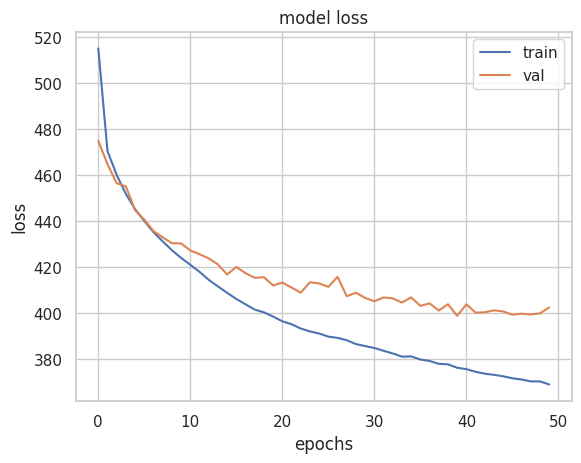

In [54]:
#изменения лосса на тренировочном датасете
plt.plot(history.history['loss'])
#изменения лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#### **Вывод**: по графику видно, что **loss** слишком большой. Попробуем построить более сложную модель, добавив полносвязные слои. Теперь у нас 5 слоев. Входной влючает в себя 128 нейронов. Далее в каждом слое кол-во нейронов уменьшается в 2 раза, на выходном слое 1 нейрон

In [55]:
#построение модели
model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1)
])

#компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

#обучение модели
history = model.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.2, verbose = 0)

#нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 383.1727
Test loss: 380.7068176269531


#### Нарисуем график

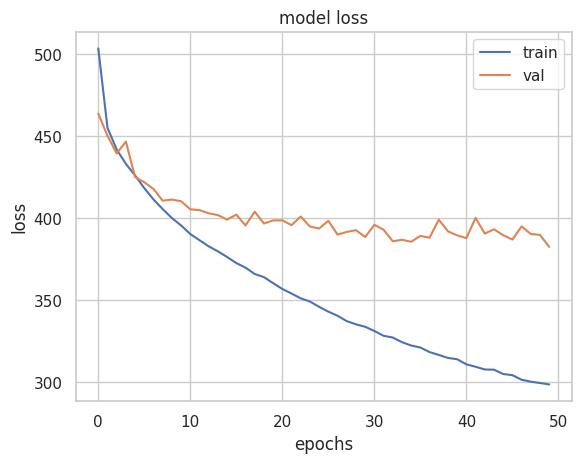

In [56]:
#изменения лосса на тренировочном датасете
plt.plot(history.history['loss'])
#изменения лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#### **Вывод**: видим что потенциал уменьшения loss большой, значит можно поставить больше эпох. Попробуем обучить на 100 эпохах

In [57]:
#построение модели
model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1)
])

#компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

#обучение модели
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 0)

#нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 395.7380
Test loss: 390.0652770996094


#### Нарисуем график

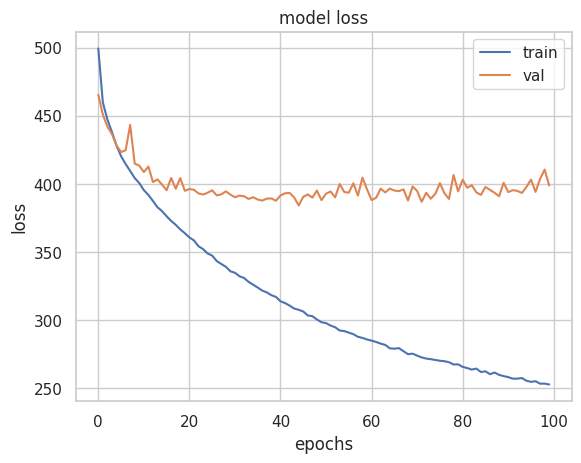

In [58]:
#изменения лосса на тренировочном датасете
plt.plot(history.history['loss'])
#изменения лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#### **Вывод**: видно что график тренировочного **loss** можно дальше понижать. Значит модель можно сделть сложнее. Попробуем на входной слой дать 16 нейронов, далее увеличивать на 2, пока не дойдем до 128 нейронов, и затем также опускаемся. И в конце на выходном слое оставим 1 нейром. Последовательность нейронов будет выглядить так: **16, 32, 64, 128, 64, 32, 16, 1**.

In [61]:
#построение модели
model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1)
])

#компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

#обучение модели
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 0)

#нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 431.5562
Test loss: 428.5892028808594


#### Построим график

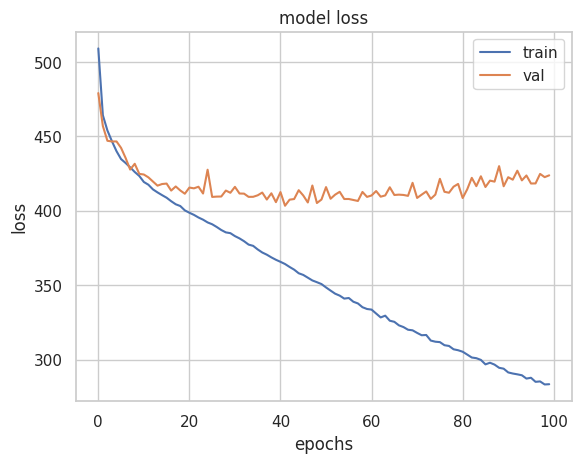

In [63]:
#изменения лосса на тренировочном датасете
plt.plot(history.history['loss'])
#изменения лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#### Выводы:
* Модель переобучается
* Модель нуждается в сглажевание весов

#### Сгладим веса используя **l2-регуляризацию**. Она сглаживает веса по квадрату. У нее есть коэффициент, называемый **параметром регуляризации**. Поставим ему значение **0.01** и применим **l2** к каждому слою. Также изменим сложность модели, а именно кол-во нейронных слоев. Теперь последовательность будет такая: **128, 64, 32, 16, 1**.

In [64]:
from keras.regularizers import l2

#построение модели
model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.01)),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dense(1)
])

#компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

#обучение модели
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 0)

#нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - loss: 409.5984
Test loss: 404.4096374511719


#### Построим график

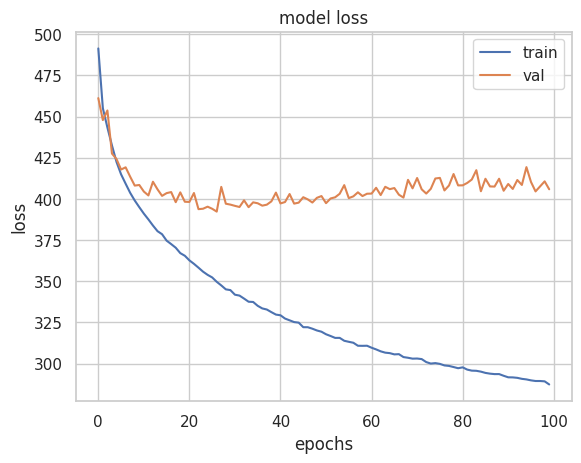

In [65]:
#изменения лосса на тренировочном датасете
plt.plot(history.history['loss'])
#изменения лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#### Видно что график почти не изменился. Также видно больше переобучение. Используем **Dropout**. Он скрывает долю нейронов в слое, где он стоит. Таким обрзаом мы будем бороться с переобучениме. Коэффициент поставим на 0.2

In [66]:
#построение модели
model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
])

#компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

#обучение модели
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 0)

#нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 401.8128
Test loss: 401.36334228515625


#### Построим график

In [42]:
#изменения лосса на тренировочном датасете
plt.plot(history.history['loss'])
#изменения лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

NameError: name 'history' is not defined

#### Видно что loss намного упал, что хорошо. Пожалуй на этом остановимся

#### Получим метрики для модели нейроного обучения

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#прогназирование на тестовой выборке
y_pred_nn = model.predict(x_test)

#вычисление метрик
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = mse_nn ** 0.5
r2_nn = r2_score(y_test, y_pred_nn)

print('Метрики для случайного леса регрессии:')
print(f'MAE: {mae_nn}')
print(f'MSE: {mse_nn}')
print(f'RMSE: {rmse_nn}')
print(f'R2: {r2_nn}')

NameError: name 'neural_network' is not defined

# Сравнение моделей машинного обучений

### Сравнивать модели будем по полученным метрикам.

#### Для начала сравним по **MAE** - средней абсолютной ошибке. Чем меньше - тем лучше. Постром столбчатую диаграмму

In [ ]:
plt.figure(figsize=(10, 6))
bar_data = {
    'x': ['RandomForest', 'GradientBoosting', 'LinearRegression', 'NeuralNetwork'],
    'y' : [mae_rf, mae_gb, mae_lr, mae_nn]
}

colors = ['#3C8EFF', '#7C3FFF', '#FFE129', '#FFAF29']

bar_df = pd.DataFrame(bar_data)
sns.barplot(x='x', y='y', data=bar_data, palette = colors)

plt.title('Сравнение MAE по различным моделямм машинногое обучения')
plt.xlabel('Модели')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

 ##### **Выводы:**
 1. **GradientBoosting**
 2. **NeuralNetwork**
 3. **RandomForest**
 4. **LinearRegression**

#### Теперь сравним по MSE - средней квадратичной ошибки. Чем меньше - тем лучше.

In [ ]:
plt.figure(figsize=(10, 6))
bar_data = {
    'x': ['RandomForest', 'GradientBoosting', 'LinearRegression', 'NeuralNetwork'],
    'y' : [mse_rf, mse_gb, mse_lr, mse_nn]
}

colors = ['#3C8EFF', '#7C3FFF', '#FFE129', '#FFAF29']

bar_df = pd.DataFrame(bar_data)
sns.barplot(x='x', y='y', data=bar_data, palette = colors)

plt.title('Сравнение MSE по различным моделямм машинногое обучения')
plt.xlabel('Модели')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

#### **Выводы:**
 1. **GradientBoosting**
 2. **NeuralNetwork**
 3. **RandomForest**
 4. **LinearRegression**

#### Теперь сравним RMSE - корень из средней квадратичной ошибки. Чем меньше - тем лучше

In [ ]:
plt.figure(figsize=(10, 6))
bar_data = {
    'x': ['RandomForest', 'GradientBoosting', 'LinearRegression', 'NeuralNetwork'],
    'y' : [rmse_rf, rmse_gb, rmse_lr, rmse_nn]
}

colors = ['#3C8EFF', '#7C3FFF', '#FFE129', '#FFAF29']

bar_df = pd.DataFrame(bar_data)
sns.barplot(x='x', y='y', data=bar_data, palette = colors)

plt.title('Сравнение RMSE по различным моделямм машинногое обучения')
plt.xlabel('Модели')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

#### **Выводы:**
 1. **GradientBoosting**
 2. **NeuralNetwork**
 3. **RandomForest**
 4. **LinearRegression**

#### Теперь сравним R2 - коэффициент детерминации. 
* R² = 1 — модель идеально предсказывает данные* 
R² = 0 — прогнозы модели соответствуют среднему арифметическому фактических целевых значени2* 
R² < 0 — модель работает хуже, чем простое использование среднего значения фактических целевых значений

In [ ]:
plt.figure(figsize=(10, 6))
bar_data = {
    'x': ['RandomForest', 'GradientBoosting', 'LinearRegression', 'NeuralNetwork'],
    'y' : [r2_rf, r2_gb, r2_lr, r2_nn]
}

colors = ['#3C8EFF', '#7C3FFF', '#FFE129', '#FFAF29']

bar_df = pd.DataFrame(bar_data)
sns.barplot(x='x', y='y', data=bar_data, palette = colors)

plt.title('Сравнение R2 по различным моделямм машинногое обучения')
plt.xlabel('Модели')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

#### **Выводы:**
 1. **GradientBoosting**
 2. **NeuralNetwork**
 3. **RandomForest**
 4. **LinearRegression**

# Кросс-валидация

### Теперь проведем **Cross Validation** - кросс-валидацию. Разделим выборку на 5 частей, каждая называется фолдом. На каждом фолде мы обучаем модель и получаем метрики. Таким образом мы получим значения необходимых ментрик.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#модель градиентного бустинга
gradient_boosting = GradientBoostingRegressor(
    learning_rate = 0.01,
    n_estimators = 1000,
    max_depth = 10,
    min_samples_split = 5,
    min_samples_leaf = 2,
    alpha = 0.1
)

#5 фолдов
kf = KFold(n_splits=5)
for fold_number, (train_fold_index, test_fold_index) in enumerate(kf.split(x_train), start=1):
    #разделяем на тренировочную и тестовую выборки
    x_train_fold, x_test_fold = x_train.iloc[train_fold_index], x_train.iloc[test_fold_index]
    y_train_fold, y_test_fold = y.iloc[train_fold_index], y.iloc[test_fold_index]

    #обучаем модель
    gradient_boosting.fit(x_train_fold, y_train_fold)

    #прогназирование на тестовой выборке
    y_pred = gradient_boosting.predict(x_test_fold)

    #вычисление метрик
    mae = mean_absolute_error(y_test_fold, y_pred)
    mse = mean_squared_error(y_test_fold, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test_fold, y_pred)
    
    print(f'Номер фолда: {fold_number}')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2: {r2:.2f}')
    print('\n')

#### **Выводы:**


# Заключение и вывод

### Метрики на кросс-валидации показывают большой разброс по сравнению с метриками после обучения. **R2** после обучения имеля хорошие показатели, но на кросс-валидации имеет отрицательные значения. Вывод: модель переобучена и не справляется с новыми данными.
### Для борьбы с переобучением можно упросить сложность модели или применить техники регуляризации (**Lasso**, **Elastic Net**).
### **Данные.** Они не очень репрезентативны. Ни один признак должным образом не коррелирует с таргетной переменной. Поэтому сложно создать качественные признаки. Возможно также что популярность зависит от признаков, которых у нас нету, например реклама или продвижение песни.

### Проделанная работа:
#### 1. Проанализирован датасет
#### 2. Созданы новые признаки
#### 3. Провели **Permutations Importance**
#### 4. Создали 4 модели машинного обучение - **деревья**, **линейные**, **модификации градиентного бустинга**, **нейроные сети**
#### 5. Провели **Cross Validation**
#### 6. Подвели итоги по проделанной работе

#### **Спасибо за внимание!**